<a href="https://colab.research.google.com/github/wanchenlang-max/econ5200-lab/blob/main/lab2_deflating_history_with_FREDipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the FRED API library
!pip install fredapi

In [ ]:
# Install the FRED API library
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='028fd9da54d1d855f09c406251c30a7a')

In [ ]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [ ]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


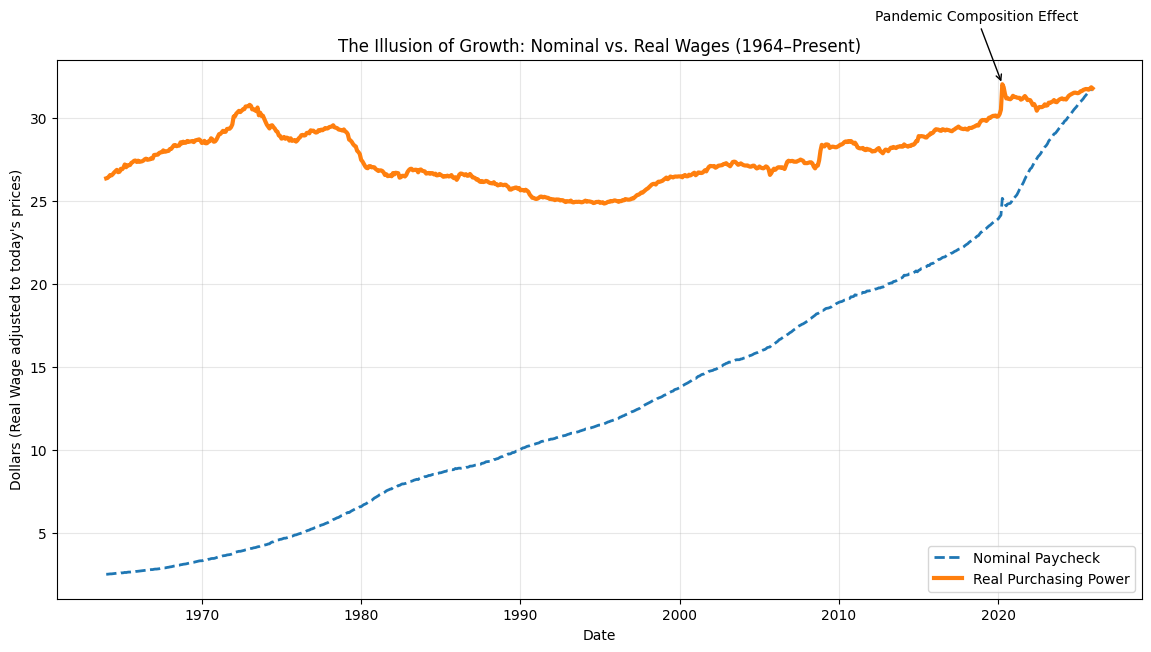

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,7))

plt.plot(df.index, df["Nominal_Wage"],
         linestyle="--", linewidth=2,
         label="Nominal Paycheck")

plt.plot(df.index, df["Real_Wage"],
         linewidth=3,
         label="Real Purchasing Power")

plt.title("The Illusion of Growth: Nominal vs. Real Wages (1964–Present)")
plt.xlabel("Date")
plt.ylabel("Dollars (Real Wage adjusted to today's prices)")
plt.grid(True, alpha=0.3)
plt.legend()

df_2020 = df.loc["2020-01-01":"2020-12-31"]
pandemic_ts = df_2020["Real_Wage"].idxmax()
pandemic_val = df_2020.loc[pandemic_ts, "Real_Wage"]

plt.annotate("Pandemic Composition Effect",
             xy=(pandemic_ts, pandemic_val),
             xytext=(pandemic_ts - pd.DateOffset(years=8), pandemic_val*1.12),
             arrowprops=dict(arrowstyle="->"))

plt.show()


Nominal wages have continued to rise over time, but real wages adjusted for inflation have remained relatively stable. This indicates that a large portion of wage growth has been offset by rising prices, so purchasing power has not increased significantly. The wage surge around 2020 was likely driven by the structural impacts of the pandemic, when many low-income workers became unemployed, leading to a temporary rise in average wages.

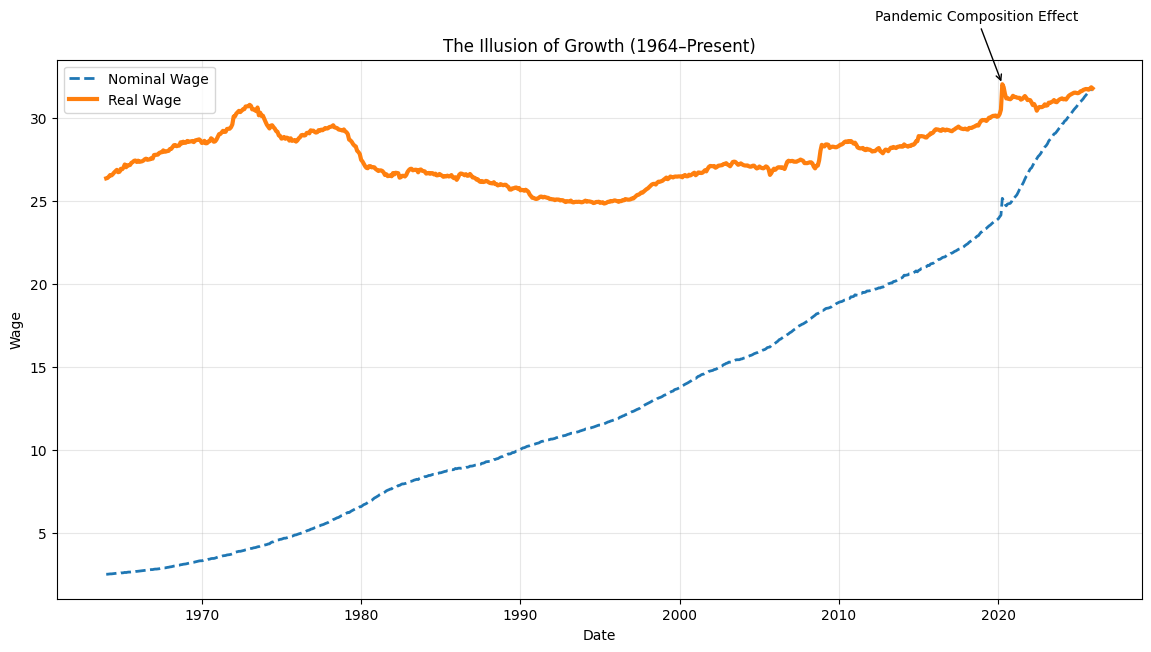

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,7))

plt.plot(df.index, df["Nominal_Wage"], "--", linewidth=2, label="Nominal Wage")
plt.plot(df.index, df["Real_Wage"], "-", linewidth=3, label="Real Wage")

plt.title("The Illusion of Growth (1964–Present)")
plt.xlabel("Date")
plt.ylabel("Wage")
plt.grid(True, alpha=0.3)
plt.legend()

df_2020 = df.loc["2020-01-01":"2020-12-31"]
spike_date = df_2020["Real_Wage"].idxmax()
spike_val = df_2020.loc[spike_date, "Real_Wage"]

plt.annotate("Pandemic Composition Effect",
             xy=(spike_date, spike_val),
             xytext=(spike_date - pd.DateOffset(years=8), spike_val*1.12),
             arrowprops=dict(arrowstyle="->"))

plt.show()


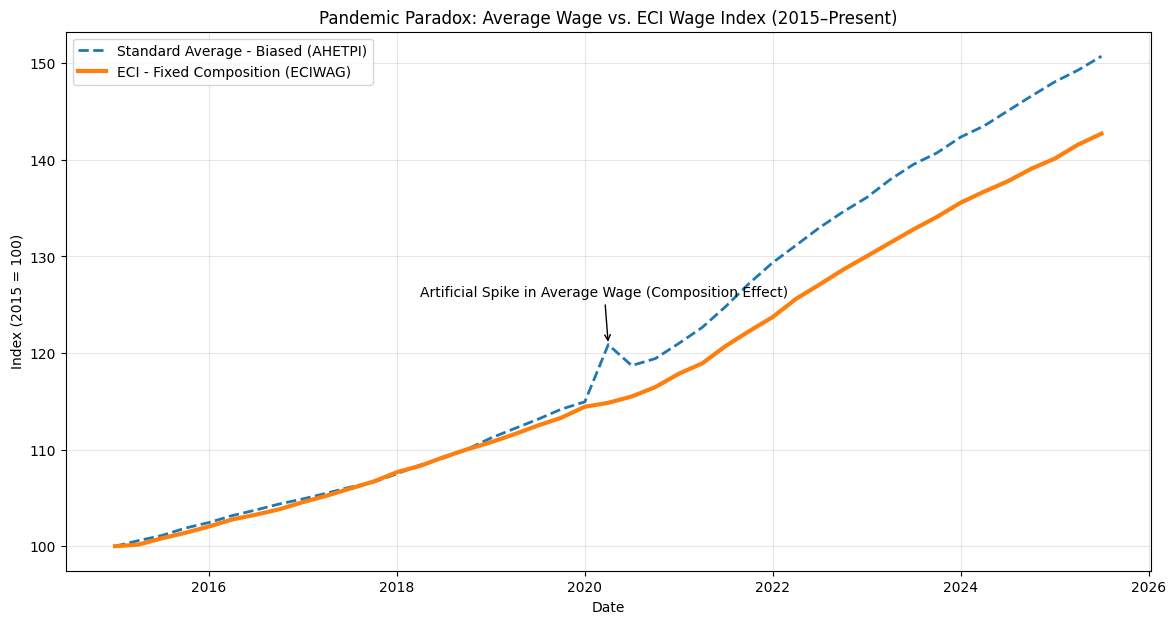

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fetch ECIWAG from FRED
eci = fred.get_series("ECIWAG")

# 2) Filter from 2015-01-01 onward
wages_2015 = wages.loc["2015-01-01":].dropna()
eci_2015   = eci.loc["2015-01-01":].dropna()

common_index = wages_2015.index.intersection(eci_2015.index)
wages_2015 = wages_2015.loc[common_index]
eci_2015   = eci_2015.loc[common_index]

# 3) Rebase both to 100 (first value = 100)
wages_index = wages_2015 / wages_2015.iloc[0] * 100
eci_index   = eci_2015   / eci_2015.iloc[0]   * 100

# 4) Plot
plt.figure(figsize=(14,7))
plt.plot(wages_index.index, wages_index, "--", linewidth=2, label="Standard Average - Biased (AHETPI)")
plt.plot(eci_index.index, eci_index, "-", linewidth=3, label="ECI - Fixed Composition (ECIWAG)")

plt.title("Pandemic Paradox: Average Wage vs. ECI Wage Index (2015–Present)")
plt.xlabel("Date")
plt.ylabel("Index (2015 = 100)")
plt.grid(True, alpha=0.3)
plt.legend()

gap = wages_index - eci_index
spike_date = gap.loc["2020-01-01":"2021-12-31"].abs().idxmax()

plt.annotate("Artificial Spike in Average Wage (Composition Effect)",
             xy=(spike_date, wages_index.loc[spike_date]),
             xytext=(spike_date - pd.DateOffset(years=2), wages_index.loc[spike_date] + 5),
             arrowprops=dict(arrowstyle="->"))

plt.show()


After adjusting both series of data with 2015 as the base period (base number = 100), the Average Hourly Earnings of Production and Nonsupervisory Employees series (AHETPI) saw a sharp surge around 2020, while the wage index within the Employment Cost Index (ECIWAG) exhibited a more steady growth trend. This confirms that the spike in average wage data in 2020 was partly driven by structural factors, as many low-income workers became unemployed during this period. The ECI series was less affected because it tracks a fixed "job basket", thus being able to reflect the underlying wage growth more clearly.
